In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
import networkx as nx
from collections import defaultdict
from time import time
from itertools import combinations_with_replacement

In [29]:
def find_all_argmax(in_dict):
    precision = 1000
    tmp_dict = defaultdict(set)
    for key, value in in_dict.items():
        new_val = int(value*precision)
        tmp_dict[new_val].add(key)
    max_val = max(tmp_dict)
    return tmp_dict[max_val]

def find_graph(graph_size, num_of_metrics):
    G_classes = []
    if (graph_size > 9):
        if (graph_size > 11):
            M = 100000
            n = graph_size
            mu, sigma = (n+1)/(n*(n-1)/2.0), 0.01 # mean and standard deviation
            s = np.random.normal(mu, sigma, M)
            print("Generating graphs")
            for k in range(M):

                if s[k] >= 1 or s[k] <= 0:
                    G_1 = nx.erdos_renyi_graph(graph_size,0.1)
                else:
                    G_1 = nx.erdos_renyi_graph(graph_size,s[k])
                G_classes.append(G_1)
        else:
            print("Generating with degree distibution")
            t1 = time()
            n = graph_size
            for max_deg in range(2, n):
               
                #max_deg = n-3
                p2 = combinations_with_replacement(range(0, max_deg), n-1)
                for degs in p2:
                    if nx.is_valid_degree_sequence([max_deg]+list(degs)):
                        try:
                            G_classes.append(nx.expected_degree_graph([max_deg]+list(degs),selfloops=False))
                        except:
                            continue
            print("Generation finished in ", time()-t1)
                    
            
    else:
        read_graph_path = "HomoGraphs/graph"+str(graph_size)+".g6" 
        t1 = time()
        G_classes = nx.read_graph6(read_graph_path)
        print("Graph reading time ", time()-t1)
    print("Runing graphs ", len(G_classes))  
    for G in G_classes:
        t1 = time()
        metrics = num_of_metrics
        if (G.number_of_selfloops()>0):
            print("Graph has selfloops!")
            continue
        max_deg_vertices = find_all_argmax(G.degree())
        #print("Degree calc time ", time()-t1)
        if len(max_deg_vertices) > 1:
            continue
        metrics -=1
            
         # Harmonic centrality 
        t1 = time()
        max_harm = find_all_argmax(nx.harmonic_centrality(G))
        #print("Harm calc time ", time()-t1)
        if len(max_harm) > 1 or len(max_deg_vertices & max_harm)>0:
            continue
        metrics -=1

        if (metrics == 0):
            return G

        # -- Betweenes centrality 
        t1 = time()
        max_betw = find_all_argmax(nx.betweenness_centrality(G))
        #print("Betweenes calc time ", time()-t1)
        #print("Edges ", G.number_of_edges())
        if len(max_betw) > 1 or len(max_betw & max_deg_vertices)>0 or len(max_betw & max_harm)>0:
            continue
        metrics -=1

        if (metrics == 0):
            return G
            
         # -- Eigen centrality
        t1 = time()
        max_eigen = find_all_argmax(nx.eigenvector_centrality_numpy(G))
        print("Eigen calc time ", time()-t1)
        print("Edges ", G.number_of_edges())
        if len(max_eigen) > 1 or len(max_deg_vertices & max_eigen)>0 or len(max_betw & max_eigen)>0 or len(max_harm & max_eigen) > 0:
            continue
        metrics -=1

        if (metrics == 0):
            return G

    return None


In [36]:
def graph_draw(G):
    if (G):
        print("Graph exist")
        print("Degree")
        print(nx.degree(G))
        print("Betwenness")
        print(nx.betweenness_centrality(G))
        print("Eigen")
        print(nx.eigenvector_centrality_numpy(G))
        
        print("Harmonic")
        print(nx.harmonic_centrality(G))
        nx.draw_networkx(G)
    else:
        print("Graph doesn't exist")

In [31]:
G = find_graph(11, 4)
graph_draw(G)

Generating with degree distibution
Generation finished in  6.571873903274536
Runing graphs  33736
Graph doesn't exist


In [221]:
G = find_graph(11, 4)
graph_draw(G)

Generating with degree distibution
Generation finished in  0.07941651344299316
Runing graphs  445
Graph doesn't exist


Generating graphs
Runing graphs  100000
Eigen calc time  0.0015976428985595703
Edges  12
Eigen calc time  0.0013306140899658203
Edges  14
Eigen calc time  0.001416921615600586
Edges  14
Eigen calc time  0.0013775825500488281
Edges  13
Eigen calc time  0.0014579296112060547
Edges  17
Eigen calc time  0.0013623237609863281
Edges  14
Eigen calc time  0.0013654232025146484
Edges  13
Eigen calc time  0.0013418197631835938
Edges  17
Eigen calc time  0.0014443397521972656
Edges  12
Eigen calc time  0.0014407634735107422
Edges  13
Eigen calc time  0.0014104843139648438
Edges  16
Eigen calc time  0.0013852119445800781
Edges  13
Eigen calc time  0.0013573169708251953
Edges  15
Eigen calc time  0.0014469623565673828
Edges  12
Eigen calc time  0.0013620853424072266
Edges  14
Eigen calc time  0.0013158321380615234
Edges  12
Eigen calc time  0.0014126300811767578
Edges  13
Eigen calc time  0.0013511180877685547
Edges  15
Eigen calc time  0.0015003681182861328
Edges  16
Eigen calc time  0.00136947631

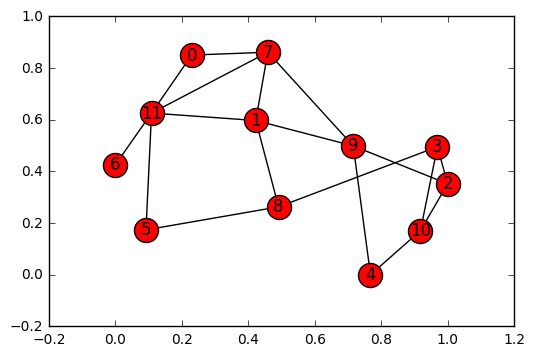

In [12]:
G = find_graph(12, 4)
graph_draw(G)

Generating graphs
Runing graphs  100000
Eigen calc time  0.0017154216766357422
Edges  13
Eigen calc time  0.0013942718505859375
Edges  13
Eigen calc time  0.0014562606811523438
Edges  13
Eigen calc time  0.0013620853424072266
Edges  13
Eigen calc time  0.0016796588897705078
Edges  18
Eigen calc time  0.001505136489868164
Edges  19
Eigen calc time  0.0014166831970214844
Edges  12
Eigen calc time  0.001367330551147461
Edges  13
Eigen calc time  0.001346588134765625
Edges  13
Eigen calc time  0.0015010833740234375
Edges  15
Eigen calc time  0.0015451908111572266
Edges  13
Eigen calc time  0.00138092041015625
Edges  12
Eigen calc time  0.0013515949249267578
Edges  13
Eigen calc time  0.0013670921325683594
Edges  12
Eigen calc time  0.0013833045959472656
Edges  12
Eigen calc time  0.0013718605041503906
Edges  13
Eigen calc time  0.0013186931610107422
Edges  14
Eigen calc time  0.0013544559478759766
Edges  14
Graph exist
Degree
{0: 1, 1: 3, 2: 3, 3: 2, 4: 1, 5: 1, 6: 3, 7: 3, 8: 2, 9: 4, 10:

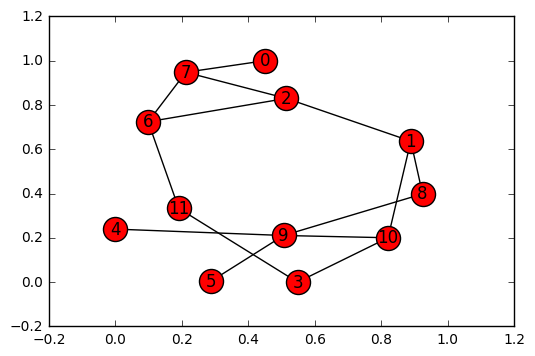

In [35]:
G = find_graph(12, 4)
graph_draw(G)

In [37]:
nx.harmonic_centrality(G)

{0: 3.9500000000000006,
 1: 6.333333333333333,
 2: 6.166666666666666,
 3: 5.416666666666667,
 4: 4.233333333333333,
 5: 4.233333333333333,
 6: 5.816666666666666,
 7: 5.65,
 8: 5.5,
 9: 6.366666666666666,
 10: 6.416666666666666,
 11: 5.249999999999999}

In [135]:
G = find_graph(11, 4)
graph_draw(G)

Generating graphs
Runing graphs  100000
Eigen calc time  0.0013191699981689453
Edges  13
Eigen calc time  0.0012788772583007812
Edges  12
Eigen calc time  0.0013158321380615234
Edges  14
Eigen calc time  0.0012962818145751953
Edges  14
Eigen calc time  0.0012483596801757812
Edges  17
Eigen calc time  0.0012946128845214844
Edges  16
Eigen calc time  0.0013060569763183594
Edges  16
Eigen calc time  0.0012888908386230469
Edges  12
Eigen calc time  0.0011126995086669922
Edges  11
Eigen calc time  0.0012984275817871094
Edges  14
Eigen calc time  0.0012996196746826172
Edges  17
Eigen calc time  0.0013155937194824219
Edges  13
Eigen calc time  0.0012996196746826172
Edges  15
Eigen calc time  0.0014090538024902344
Edges  12
Eigen calc time  0.0012912750244140625
Edges  13
Eigen calc time  0.0012753009796142578
Edges  12
Eigen calc time  0.0012938976287841797
Edges  12
Eigen calc time  0.001268625259399414
Edges  12
Graph doesn't exist
